In [2]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

plt.rcParams['figure.dpi'] = 150

In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [4]:
wavelength = [] #Wavelength list
Intensity = [] # Intensity list


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=1)
    wavelength.append(Data[:, 0])
    Intensity.append(Data[:, 1]) 

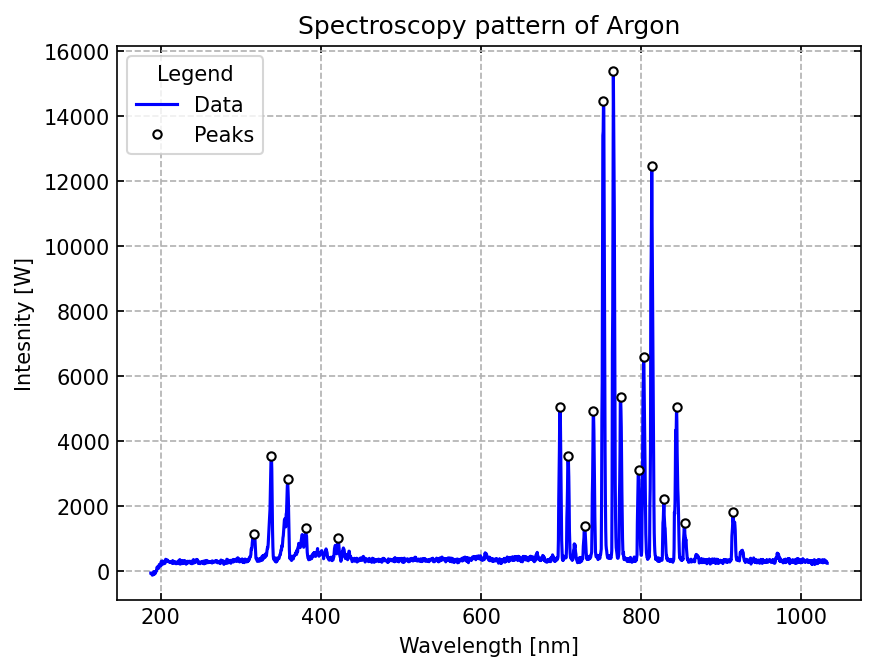

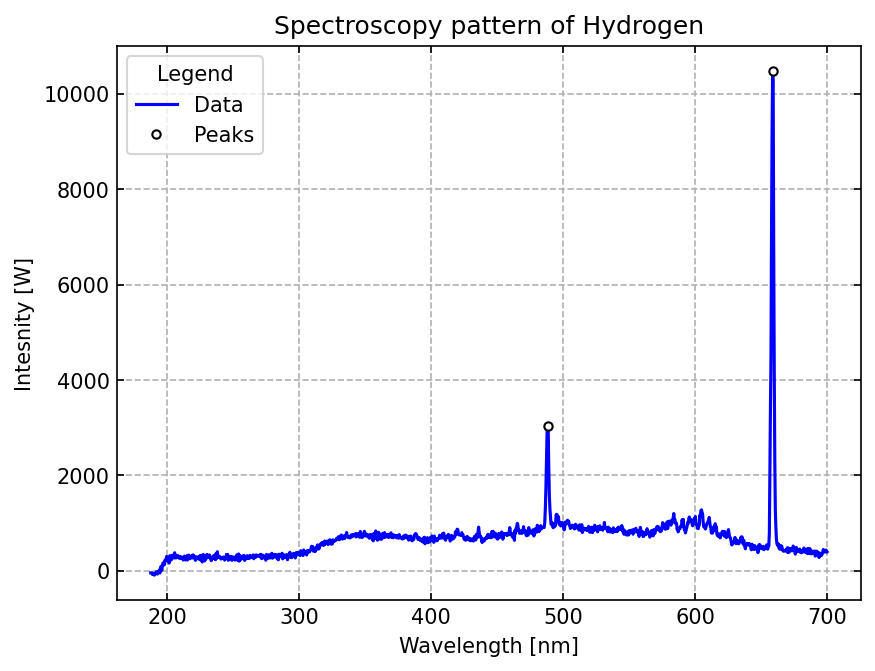

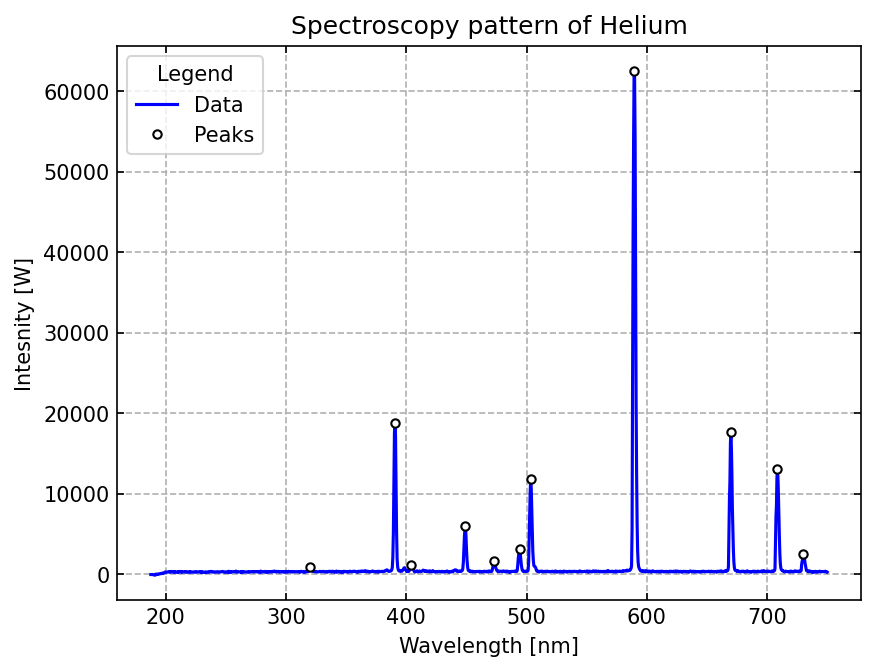

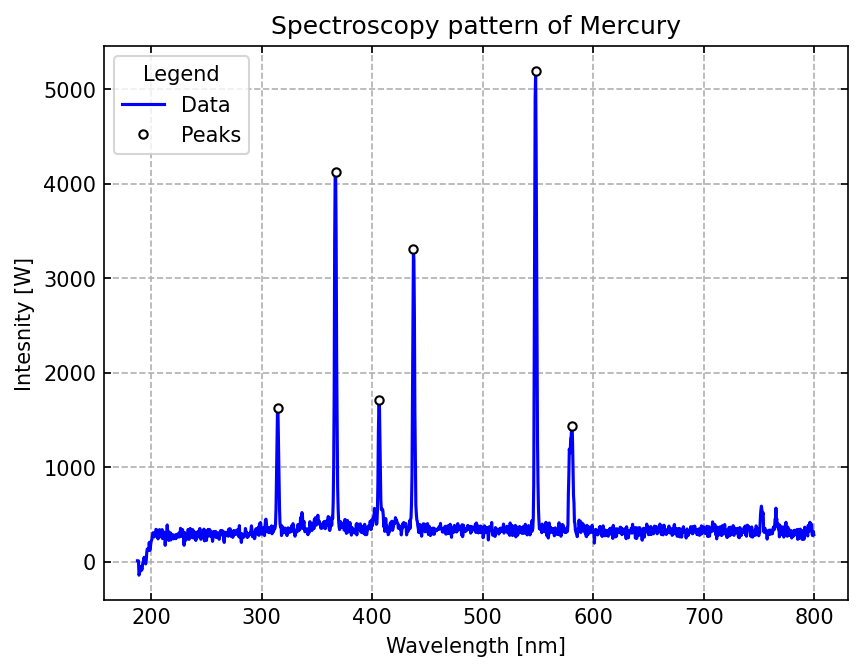

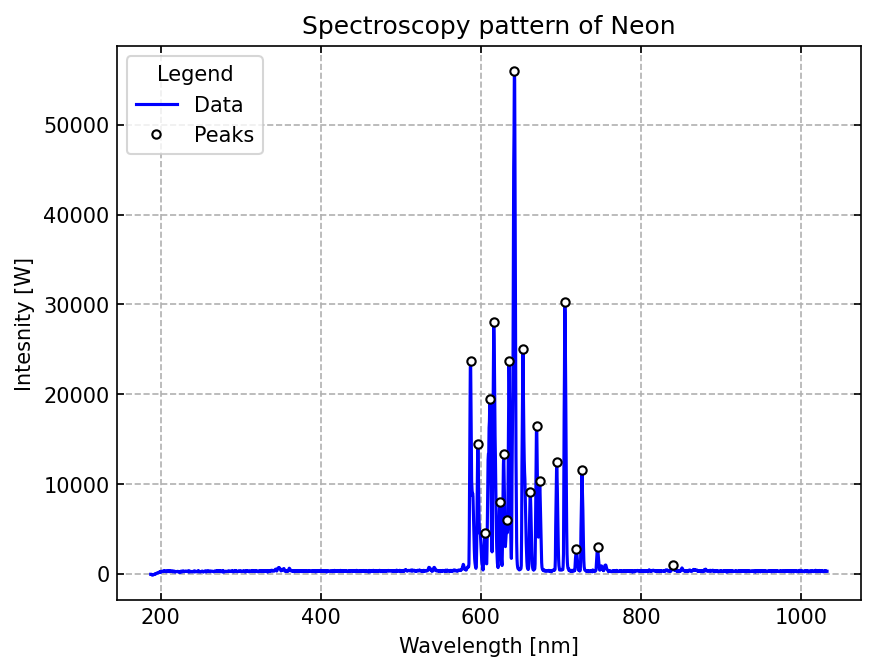

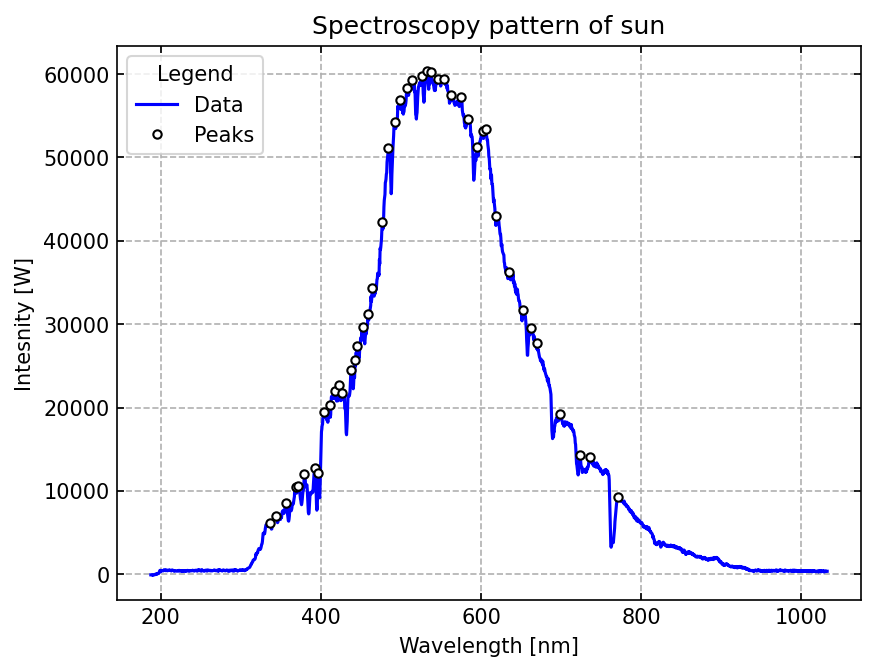

In [21]:
Wavelength_line = [] #store wavelength value for each found peak
names = ['Argon', 'Hydrogen', 'Helium', 'Mercury', 'Neon', 'sun']

for i, intensity in enumerate(Intensity):
    plt.figure()
    plt.plot(wavelength[i], intensity, color = 'blue', label = 'Data')
    peaks, _ = find_peaks(intensity, prominence = 700)
    peaks_wavelangth = [wavelength[i][peak] for peak in peaks]
    Wavelength_line.append(peaks_wavelangth)
    peaks_intensity = [intensity[peak] for peak in peaks]
    plt.plot(peaks_wavelangth, peaks_intensity, 'o', color = 'white', markeredgecolor = 'k', markersize = 4, label = 'Peaks')
    plt.title(f'Spectroscopy pattern of {names[i]}')
    plt.grid(ls = '--')
    plt.tick_params(direction = 'in', top = True, right = True)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Intesnity [W]')
    plt.legend(loc = 'upper left', title = 'Legend')
    

In [6]:
Wavelength_line[1] #Found for hydrogen

[488.322, 658.743]

In [7]:
#Rydberg equation

R = 1.097e7
nf = 2
ni=[]

for i in range(len(Wavelength_line[1])):
    n = np.sqrt(-1*(nf**2-Wavelength_line[1][i]*R))
    ni.append(n)
    

ni #this gives the correct wavelengths, just at a factor of 100 out? fuck that, its correct.
#These wavelengths are proportional to a change from n=3->n=2 and n=4 -> n=2

[73190.7940659206, 85008.29786556134]

In [8]:
sun_data = Data = np.loadtxt('Data_Labday_1/Labday_1_sun.txt', skiprows=1)
sun_wavelength = sun_data[:, 0] * 1e-9
sun_intensity = sun_data[:, 1]

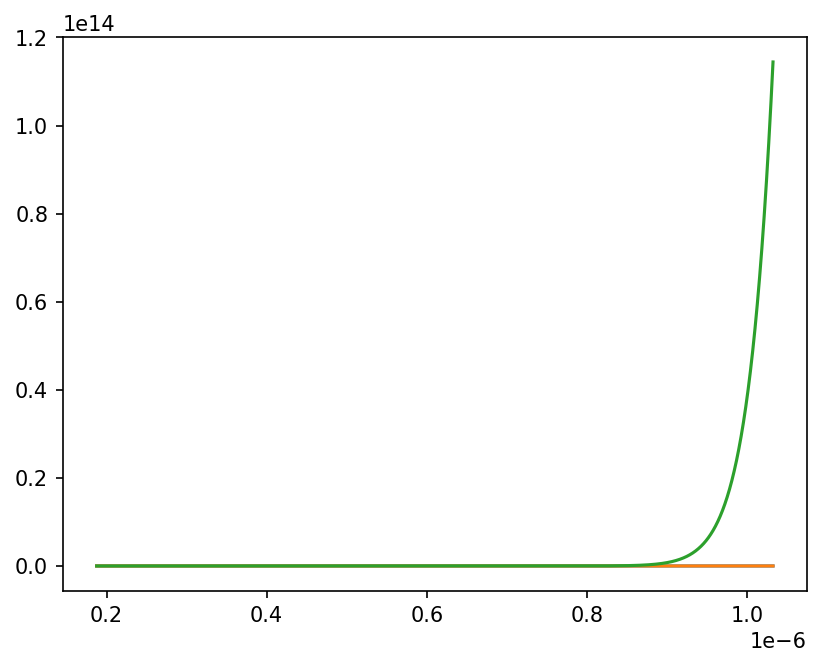

In [9]:
from scipy.optimize import curve_fit


def planck_fit(lam, *p):
    a = p[0]
    b = p[1]
    return (a / lam ** 5) * (1/(np.exp(1/lam * b) - 1))

a_guess = 9
b_guess = 0.4e-4

p0 = [a_guess, b_guess]

p_opt, p_cov = curve_fit(planck_fit, sun_wavelength, sun_intensity, p0 = p0)

plt.plot(sun_wavelength, sun_intensity)
plt.plot(sun_wavelength, planck_fit(sun_wavelength, *p_opt))
plt.plot(sun_wavelength, planck_fit(sun_wavelength, *p0))


